# NBA Optimal Player Position Model
## Finding The optimal position for a player based off of height

Data used: https://www.kaggle.com/drgilermo/nba-players-stats#player_data.csv


## Goals
* Analyze data to see what each position is best at
* Look for any correlation between height and certain skills
* Predict what position someone is best suited for based on height and skills

# Data Pull

About the data:
* Two sets of data
* One set contains statistics of every player in every season from 1950 to 2018
* The other contains personal information of each player (height, weight, birth date, college, etc.)
* Set 1 has almost 25,000 rows
* This is larger than set 2 due to multiple inputs of players who played multiple years

In [4]:
import pandas as pd
path = r'C:\Users\Randall\PycharmProjects\CSCI334\Seasons_Stats.csv' ## change this
players = pd.read_csv(path) ## players data set contains statistics
print("Data shape: ", players.shape)
players.head()

Data shape:  (24691, 53)


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


###  This is the second data set only being used for player heights

In [5]:
path = r'C:\Users\Randall\PycharmProjects\CSCI334\player_data.csv'
player_data = pd.read_csv(path)
print("Data shape: ", player_data.shape)
player_data = player_data.drop(columns=['year_start', 'weight', 'birth_date', 'college'])
player_data = player_data.sort_values('name')

player_data['feet'] = player_data['height'].astype(str).str[0]
player_data['inches'] = player_data['height'].astype(str).str[2:]

import numpy as np
player_data.feet = pd.to_numeric(player_data.feet, errors='coerce').fillna(0).astype(np.int64)
player_data.inches = pd.to_numeric(player_data.inches, errors='coerce').fillna(0).astype(np.int64)
player_data['newHeight'] = (player_data['feet'] * 12) + player_data['inches']

player_data.head()

Data shape:  (4550, 8)


,name,year_end,position,height,feet,inches,newHeight
1500,A.C. Green,2001,F-C,6-9,6,9,81
435,A.J. Bramlett,2000,C,6-10,6,10,82
1162,A.J. English,1992,G,6-3,6,3,75
1565,A.J. Guyton,2003,G,6-1,6,1,73
1606,A.J. Hammons,2017,C,7-0,7,0,84


In [6]:
## view null values pre cleaning
players.isnull().sum()

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


## Data Cleaning

There are 2 values that stick out in null, 5764 and 3894
This is due to the NBA not tracking these statistics until certain seasons

* For our purpose year, team, age are not necessary
* Percentages for many values are not necessary either
* Keeping minutes played to identify regular players and not bench warmers
* Cutoff year is 1980, year 3 pt line was introduced

In [7]:
players = players[players['Year'] > 1979]
players = players.drop(columns=['Unnamed: 0', 'Year', 'Tm', 'ORB', 'DRB', 'PF', 'FTA', 'FT', 'VORP', 'BPM', 'WS', 'USG%', 'Age', 
                      'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'BLK%',
                     'TOV%', 'blanl', 'blank2', 'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', 'eFG%'])
print(players.shape)
players.head()

(18927, 20)


,Player,Pos,G,STL%,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT%,TRB,AST,STL,BLK,TOV,PTS
5727,Kareem Abdul-Jabbar*,C,82.0,1.2,835.0,1383.0,0.604,0.0,1.0,0.000,835.0,1382.0,0.604,0.765,886.0,371.0,81.0,280.0,297.0,2034.0
5728,Tom Abernethy,PF,67.0,1.4,153.0,318.0,0.481,0.0,1.0,0.000,153.0,317.0,0.483,0.683,191.0,87.0,35.0,12.0,39.0,362.0
5729,Alvan Adams,C,75.0,2.3,465.0,875.0,0.531,0.0,2.0,0.000,465.0,873.0,0.533,0.797,609.0,322.0,108.0,55.0,218.0,1118.0
5730,Tiny Archibald*,PG,80.0,1.7,383.0,794.0,0.482,4.0,18.0,0.222,379.0,776.0,0.488,0.830,197.0,671.0,106.0,10.0,242.0,1131.0
5731,Dennis Awtrey,C,26.0,1.0,27.0,60.0,0.450,0.0,0.0,NaN,27.0,60.0,0.450,0.640,115.0,40.0,12.0,15.0,27.0,86.0


In [8]:
players.isnull().sum()
# We opted to remove columns before the 3 point line was introduced
# For columns with 3000 missing values or less,

# Labels:
# STL% Steal %
# FG Field Goals
# FGA Field Goal Attempts
# 3P 3-Point Field Goal
# 2P 2-Point Field Goals
# FT% Free Throw Percentage
# TRB Total rebounds
# AST Assists
# BLK Blocks
# TOV Turnovers

Player       0
Pos          0
G            0
STL%         5
FG           0
FGA          0
FG%         88
3P           0
3PA          0
3P%       3511
2P           0
2PA          0
2P%        117
FT%        745
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PTS          0
dtype: int64

In [9]:
players.dtypes

Player     object
Pos        object
G         float64
STL%      float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
FT%       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PTS       float64
dtype: object

In [10]:
players_career = players.groupby('Player').mean()
print(players_career.shape)
players_career.head()

(2835, 18)


,G,STL%,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT%,TRB,AST,STL,BLK,TOV,PTS
Player,,,,,,,,,,,,,,,,,,
A.C. Green,75.611111,1.438889,265.444444,538.111111,0.487667,6.944444,28.277778,0.146833,258.5,509.833333,0.501889,0.708056,562.722222,81.611111,61.277778,31.222222,83.777778,718.222222
A.J. Bramlett,8.000000,0.800000,4.000000,21.000000,0.190000,0.000000,0.000000,NaN,4.0,21.000000,0.190000,NaN,22.000000,0.000000,1.000000,0.000000,3.000000,8.000000
A.J. English,75.500000,0.900000,308.500000,709.000000,0.436000,4.500000,32.500000,0.136500,304.0,676.500000,0.450500,0.774000,157.500000,160.000000,28.500000,12.000000,101.500000,751.000000
A.J. Guyton,26.666667,2.466667,55.333333,146.666667,0.255667,24.333333,64.333333,0.255000,31.0,82.333333,0.254000,0.824000,26.666667,49.000000,6.666667,4.000000,20.666667,147.333333
A.J. Hammons,22.000000,0.300000,17.000000,42.000000,0.405000,5.000000,10.000000,0.500000,12.0,32.000000,0.375000,0.450000,36.000000,4.000000,1.000000,13.000000,10.000000,48.000000


In [11]:
player_data = player_data[player_data['year_end'] > 1980]
player_data = player_data.drop_duplicates(subset="name",keep='first')
player_data = player_data.set_index('name')
print(player_data.shape)
player_data.head()

(2861, 6)


,year_end,position,height,feet,inches,newHeight
name,,,,,,
A.C. Green,2001,F-C,6-9,6,9,81
A.J. Bramlett,2000,C,6-10,6,10,82
A.J. English,1992,G,6-3,6,3,75
A.J. Guyton,2003,G,6-1,6,1,73
A.J. Hammons,2017,C,7-0,7,0,84


In [12]:
## join sets together by name and average each players stats

players_career = players_career.join(player_data)
players_career = players_career.dropna()
players_career.head()


,G,STL%,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,STL,BLK,TOV,PTS,year_end,position,height,feet,inches,newHeight
Player,,,,,,,,,,,,,,,,,,,,,
A.C. Green,75.611111,1.438889,265.444444,538.111111,0.487667,6.944444,28.277778,0.146833,258.500000,509.833333,...,61.277778,31.222222,83.777778,718.222222,2001.0,F-C,6-9,6.0,9.0,81.0
A.J. English,75.500000,0.900000,308.500000,709.000000,0.436000,4.500000,32.500000,0.136500,304.000000,676.500000,...,28.500000,12.000000,101.500000,751.000000,1992.0,G,6-3,6.0,3.0,75.0
A.J. Guyton,26.666667,2.466667,55.333333,146.666667,0.255667,24.333333,64.333333,0.255000,31.000000,82.333333,...,6.666667,4.000000,20.666667,147.333333,2003.0,G,6-1,6.0,1.0,73.0
A.J. Hammons,22.000000,0.300000,17.000000,42.000000,0.405000,5.000000,10.000000,0.500000,12.000000,32.000000,...,1.000000,13.000000,10.000000,48.000000,2017.0,C,7-0,7.0,0.0,84.0
A.J. Price,31.888889,1.277778,66.666667,175.666667,0.355222,25.888889,83.000000,0.242889,40.777778,92.666667,...,14.666667,1.000000,27.000000,184.000000,2015.0,G,6-2,6.0,2.0,74.0


# Plotting and Matrices

* We split the players by positions to get a better look at height distributions by position and see how height may affect different statistics
* We also included a correlation matrix to show what stats have the largest correlation and which ways height affects them

In [13]:
guards_= players_career[players_career['position'] == 'G']

In [14]:
forwards_ = players_career[players_career['position'] == 'F']

In [15]:
centers_ = players_career[players_career['position'] == 'C']

Text(0, 0.5, 'Assists')

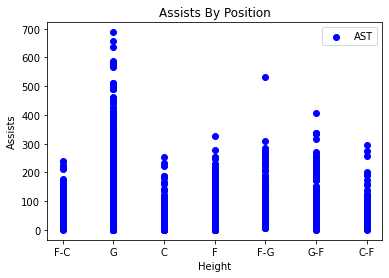

In [17]:
import matplotlib.pyplot as plt
plt.scatter(players_career['position'].astype('str'), 'AST', data=players_career, marker='o', color='blue')
plt.legend()
plt.title('Assists By Position')
plt.xlabel('Height')
plt.ylabel('Assists')

Text(0, 0.5, 'Assists')

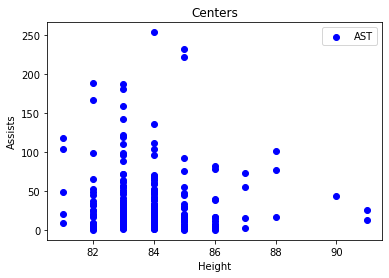

In [18]:
plt.scatter('newHeight', 'AST', data=centers_, marker='o', color='blue')
plt.legend()
plt.title('Centers')
plt.xlabel('Height')
plt.ylabel('Assists')


Text(0, 0.5, 'Assists')

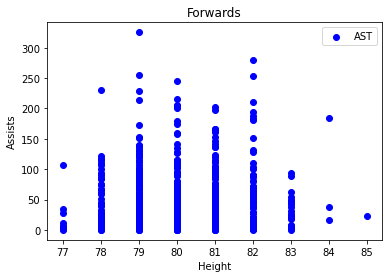

In [19]:
plt.scatter('newHeight', 'AST', data=forwards_, marker='o', color='blue')
plt.legend()
plt.title('Forwards')
plt.xlabel('Height')
plt.ylabel('Assists')

Text(0, 0.5, 'Assists')

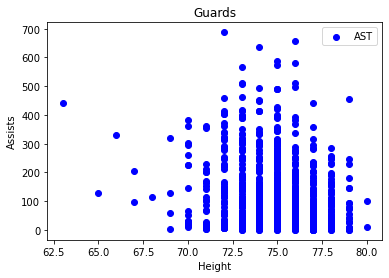

In [20]:
plt.scatter('newHeight', 'AST', data=guards_, marker='o', color='blue')
plt.legend()
plt.title('Guards')
plt.xlabel('Height')
plt.ylabel('Assists')

                  G       FG%       3P%       TRB       AST       STL  \
G          1.000000  0.454371  0.099054  0.725581  0.612036  0.756358   
FG%        0.454371  1.000000 -0.045618  0.482593  0.184259  0.293923   
3P%        0.099054 -0.045618  1.000000 -0.067429  0.219187  0.177992   
TRB        0.725581  0.482593 -0.067429  1.000000  0.378820  0.593972   
AST        0.612036  0.184259  0.219187  0.378820  1.000000  0.835624   
STL        0.756358  0.293923  0.177992  0.593972  0.835624  1.000000   
BLK        0.501782  0.401346 -0.157360  0.775341  0.131828  0.335011   
PTS        0.774182  0.379014  0.182886  0.749456  0.722508  0.809411   
newHeight  0.112749  0.288939 -0.277898  0.408318 -0.351935 -0.161175   

                BLK       PTS  newHeight  
G          0.501782  0.774182   0.112749  
FG%        0.401346  0.379014   0.288939  
3P%       -0.157360  0.182886  -0.277898  
TRB        0.775341  0.749456   0.408318  
AST        0.131828  0.722508  -0.351935  
STL        

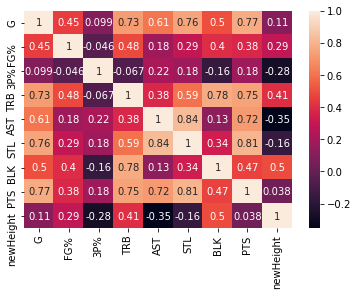

In [21]:
import seaborn as sn
players_career_simple = players_career.drop(columns={'STL%', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', '2P%', 'FT%', 'TOV', 'year_end',
                                                     'feet', 'inches'})
corrMatrix = players_career_simple.corr()
print(corrMatrix)

sn.heatmap(corrMatrix, annot=True)
plt.show()

# Modeling

* Using sklearn pipeline

In [22]:
# TREE: predicting position
import sklearn
from sklearn.model_selection import train_test_split

players_career = players_career.drop(columns=['year_end','height', 'feet', 'inches'])

# creating training/test sets
train, test = train_test_split(players_career, test_size=0.20)
train_X = train.drop('position', axis=1)
train_y = train['position']
test_X = test.drop('position', axis=1)
test_y = test['position']

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# creating pipeline
pipe = Pipeline(steps=[('classifier', RandomForestClassifier())])

pipe.fit(train_X, train_y)

y_pred = pipe.predict(test_X)
y_pred

array(['C', 'C', 'F', 'G', 'G', 'G', 'G', 'F', 'G', 'C', 'G', 'F', 'G',
       'G', 'G', 'F', 'F-G', 'F-C', 'C', 'F', 'G', 'F', 'F-C', 'F', 'F',
       'F-C', 'F', 'F', 'G', 'G', 'G', 'F', 'F', 'C', 'C', 'F', 'G', 'F',
       'C', 'F', 'F', 'G', 'C', 'G', 'G', 'G', 'G', 'F', 'C', 'F', 'G',
       'G', 'F', 'F', 'G', 'G', 'C', 'C', 'G', 'F', 'G', 'G', 'C', 'G',
       'F', 'F', 'G', 'F', 'F', 'F-C', 'F', 'F', 'F', 'F', 'G-F', 'G',
       'G', 'G', 'F', 'F-C', 'F', 'C', 'F', 'F', 'G', 'F-C', 'F', 'G',
       'C', 'F', 'G', 'C', 'F', 'F', 'F', 'G', 'C', 'G', 'F', 'G', 'C',
       'F', 'G', 'F', 'F-C', 'G', 'F', 'G-F', 'F-C', 'F', 'F', 'F', 'G',
       'G', 'G', 'F', 'G', 'G', 'G', 'C', 'C', 'F', 'C', 'F', 'F', 'F',
       'F', 'F', 'F-G', 'G', 'F', 'C', 'F', 'C-F', 'F', 'F', 'G', 'G',
       'G', 'F', 'G', 'C', 'G', 'F', 'G', 'G', 'G', 'G', 'F', 'G', 'F-G',
       'G', 'F', 'C', 'G', 'G', 'G-F', 'G', 'G', 'G-F', 'G', 'F', 'C',
       'F', 'F', 'G', 'F-C', 'C', 'G', 'G', 'G', 'F', 'G', 'F'

In [24]:
# this code creates a confusion matrix/classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

[[ 34   4   6   3   0   0   0]
 [  7   1   7   6   1   0   0]
 [  2   0 112   5   0   2   3]
 [  6   2  21   7   0   0   0]
 [  0   0  17   0   2   2   2]
 [  0   0   3   0   1 167   0]
 [  0   0  10   0   1  22   7]]
              precision    recall  f1-score   support

           C       0.69      0.72      0.71        47
         C-F       0.14      0.05      0.07        22
           F       0.64      0.90      0.75       124
         F-C       0.33      0.19      0.25        36
         F-G       0.40      0.09      0.14        23
           G       0.87      0.98      0.92       171
         G-F       0.58      0.17      0.27        40

    accuracy                           0.71       463
   macro avg       0.52      0.44      0.44       463
weighted avg       0.66      0.71      0.66       463



49


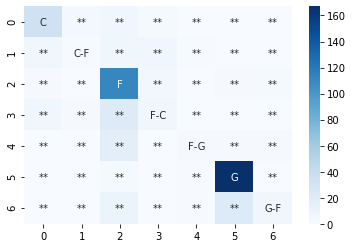

In [26]:
cf = confusion_matrix(test_y, y_pred)
labels = ['C','**','**','**', '**', '**', '**',
          '**', 'C-F', '**', '**', '**', '**', '**',
          '**', '**', 'F', '**', '**', '**', '**',
          '**', '**', '**', 'F-C', '**', '**', '**',
          '**', '**', '**', '**', 'F-G', '**', '**',
          '**', '**', '**', '**', '**', 'G', '**',
          '**', '**', '**', '**', '**', '**', 'G-F']
print(len(labels))
labels = np.asarray(labels).reshape(7,7)
sn.heatmap(cf, annot=labels, fmt='', cmap='Blues')
plt.show()

# Conclusion
* We were able to predict the normal positions with greater accuracy due to a larger pool of players that only play at one position
* Our overall goal was to create a model that can predict a players most optimal position and we did not quite make it to that goal since we only got to a point where we can predict a position however we have no clue why the wrong predictions were predicted wrong
* Some things that we could have done to improve our model is use metrics that adjust the statistics for the evolution of play style throughout the years
* Another possible change we could have made is look at other statistics to correlate with position that could have increased the model's predicitions